In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [27]:
sort_score = open( "sort_score.txt", "r" ).readlines()

In [16]:
scores = {
    column_name.strip(" ").strip("\n"): [] for column_name in sort_score[0].split(",")
}
print( list( scores.keys() ) )

dict_keys(['Total', 'Jet', 'MET', 'Lep'])


In [19]:
columns = list(scores.keys())
for line in sort_score[1:]:
    entries = [ float(val.strip(" ").strip("\n") ) for val in line.split(",") ]
    for i, column in enumerate(columns):
        scores[ column ].append( entries[i] )

### Plot the distribution for the total score ranks

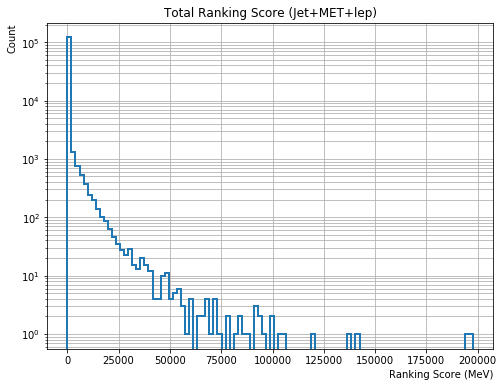

In [68]:
plt.figure( figsize = (8,6) )
plt.grid( which = "both", zorder = 0 )
plt.hist( scores[ "Total" ], bins = 100, histtype = "step", linewidth = 2, zorder = 3 )
plt.title( "Total Ranking Score (Jet+MET+lep)" )
plt.xlabel( "Ranking Score (MeV)", ha = "right", x = 1.0 )
plt.ylabel( "Count", ha = "right", y = 1.0 )
plt.yscale( "log" )
plt.show()

### Plot the distribution for the total score ranks for only the top-scoring vertex

In [58]:
top_scores = []
top_events = []
for i, score in enumerate( scores[ "Total" ][:-1] ):
    if i == 0: top_scores.append( score )
    else:
        if score < scores[ "Total" ][ i+1 ]:
            top_scores.append( scores[ "Total" ][ i+1 ] )
            top_events.append( i )

In [71]:
print( "Total number of events considered: {}".format( len( top_events ) ) )

Total number of events considered: 5003


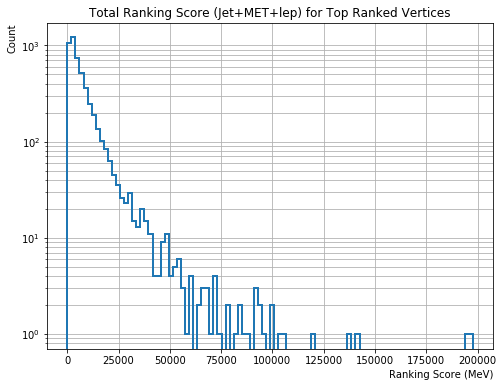

In [69]:
plt.figure( figsize = (8,6) )
plt.grid( which = "both", zorder = 0 )
plt.hist( top_scores, bins = 100, histtype = "step", linewidth = 2, zorder = 3 )
plt.title( "Total Ranking Score (Jet+MET+lep) for Top Ranked Vertices" )
plt.xlabel( "Ranking Score (MeV)", ha = "right", x = 1.0 )
plt.ylabel( "Count", ha = "right", y = 1.0 )
plt.yscale( "log" )
plt.show()

### Plot the individual score (jet, MET, lep) ratio distributions

In [41]:
jet_ratios = []
met_ratios = []
lep_ratios = []
zero_count = 0
for i in range( len( scores[ "Total" ] ) ):
    if scores[ "Total" ][i] > 0:
        jet_ratios.append( scores[ "Jet" ][i] / scores[ "Total" ][i] )
        met_ratios.append( scores[ "MET" ][i] / scores[ "Total" ][i] )
        lep_ratios.append( scores[ "Lep" ][i] / scores[ "Total" ][i] )
    else: zero_count += 1
print( "Number of \"0\" total scores: {}".format( zero_count ) )

Number of "0" total scores: 239


Jet ratio distributions

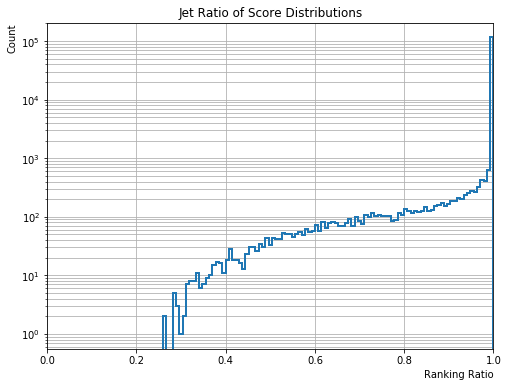

In [47]:
plt.figure( figsize = (8,6) )
plt.grid( which = "both", zorder = 0 )
plt.hist( jet_ratios, bins = 100, histtype = "step", linewidth = 2, zorder = 3 )
plt.title( "Jet Ratio of Score Distributions" )
plt.xlabel( "Ranking Ratio", ha = "right", x = 1.0 )
plt.xlim( 0, 1 )
plt.ylabel( "Count", ha = "right", y = 1.0 )
plt.yscale( "log" )
plt.show()

MET ratio distributions

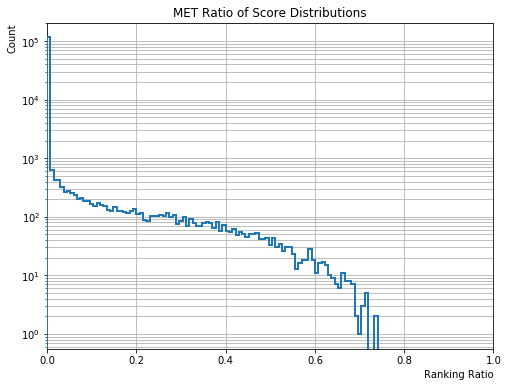

In [48]:
plt.figure( figsize = (8,6) )
plt.grid( which = "both", zorder = 0 )
plt.hist( met_ratios, bins = 100, histtype = "step", linewidth = 2, zorder = 3 )
plt.title( "MET Ratio of Score Distributions" )
plt.xlabel( "Ranking Ratio", ha = "right", x = 1.0 )
plt.xlim( 0, 1 )
plt.ylabel( "Count", ha = "right", y = 1.0 )
plt.yscale( "log" )
plt.show()

Lepton ratio distributions

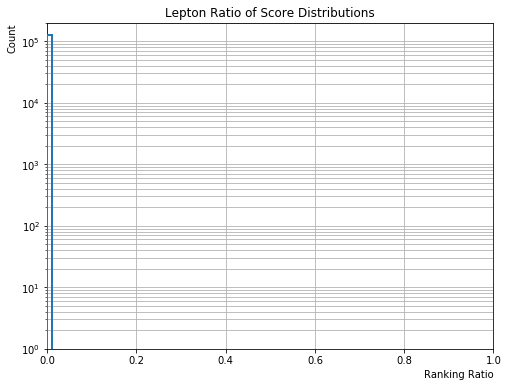

In [53]:
plt.figure( figsize = (8,6) )
plt.grid( which = "both", zorder = 0 )
plt.hist( lep_ratios, bins = 100, histtype = "step", linewidth = 2, zorder = 3 )
plt.title( "Lepton Ratio of Score Distributions" )
plt.xlabel( "Ranking Ratio", ha = "right", x = 1.0 )
plt.xlim( 0, 1 )
plt.ylabel( "Count", ha = "right", y = 1.0 )
plt.ylim( 1, 2e5 )
plt.yscale( "log" )
plt.show()

### Count the instances where the MET score changes the JET-only ranking
The event number is an event were the MET was large enough to make the lower Jet score have a higher total rank.

In [56]:
unique_events = []
rank_change = 0
for i in range( len( scores[ "Total" ][1:-1] ) ):
    if scores[ "Total" ][i] > scores[ "Total" ][ i-1 ]:
        if scores[ "Jet" ][i] < scores[ "Jet" ][i+1]:
            rank_change += 1
            unique_events.append( i )
print( "MET score rank change instances: {}".format( rank_change ) )

MET score rank change instances: 35


In [61]:
top_rank_change = 0
for event_index in unique_events:
    if event_index in top_events:
        top_rank_change += 1
print( "The top ranked vertex changed because of MET for the following events: {}".format( top_rank_change ) )

The top ranked vertex changed because of MET for the following events: 0


In [63]:
met_over_jet = []
for i in range( len( scores[ "Total" ] ) ):
    if scores[ "MET" ][i] > scores[ "Jet" ][i]:
        met_over_jet.append( scores[ "MET" ][i] - scores[ "Jet" ][i] )
print( "The number of events where the MET score was greater than the Jet score is: {}".format( len( met_over_jet ) ) )

The number of events where the MET score was greater than the Jet score is: 486


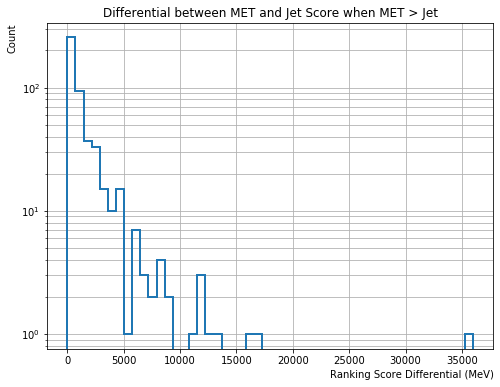

In [70]:
plt.figure( figsize = (8,6) )
plt.grid( which = "both", zorder = 0 )
plt.hist( met_over_jet, bins = 50, histtype = "step", linewidth = 2, zorder = 3 )
plt.title( "Differential between MET and Jet Score when MET > Jet" )
plt.xlabel( "Ranking Score Differential (MeV)", ha = "right", x = 1.0 )
plt.ylabel( "Count", ha = "right", y = 1.0 )
plt.yscale( "log" )
plt.show()